In [1]:
import pandas as pd
import numpy as np
import scipy

prec = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/prec_1991_2015.xls')
temp = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/temp_1991_2015.xls')
occur = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/aegypti_albopictus.xlsx')

In [2]:
occur

,VECTOR,OCCURRENCE_ID,SOURCE_TYPE,LOCATION_TYPE,POLYGON_ADMIN,Y,X,YEAR,COUNTRY,COUNTRY_ID,GAUL_AD0,STATUS
0,Aedes aegypti,1,published,point,-999,-3.220000e+00,4.007000e+01,1958,Kenya,KEN,133,NaN
1,Aedes aegypti,2,published,point,-999,-4.270000e+00,1.530000e+01,1960,Congo,COG,59,NaN
2,Aedes aegypti,3,published,point,-999,-4.270000e+00,1.530000e+01,1960,Congo,COG,59,NaN
3,Aedes aegypti,4,published,point,-999,-3.220000e+00,4.007000e+01,1960,Kenya,KEN,133,NaN
4,Aedes aegypti,5,published,point,-999,-3.040000e+00,4.014000e+01,1960,Kenya,KEN,133,NaN
5,Aedes aegypti,6,published,point,-999,1.800000e-01,3.250000e+01,1960,Uganda,UGA,253,NaN
6,Aedes aegypti,7,published,point,-999,4.630000e+00,-7.409000e+01,1960,Colombia,COL,57,NaN
7,Aedes aegypti,8,published,point,-999,6.010000e+00,1.050000e+00,1960,Ghana,GHA,94,NaN
8,Aedes aegypti,9,published,point,-999,6.490000e+00,3.370000e+00,1960,Nigeria,NGA,182,NaN
9,Aedes aegypti,10,published,point,-999,1.034000e+01,-6.704000e+01,1960,Venezuela,VEN,263,NaN


In [3]:
temp.rename(columns={'\tYear':'Year', ' Month':'Month', ' Country':'Country'}, inplace=True)
prec.rename(columns={'\tYear':'Year', ' Month':'Month', ' Country':'Country'}, inplace=True)
occur.rename(columns={'YEAR':'Year', 'COUNTRY_ID':'Country'}, inplace=True)

In [4]:
taywan = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/taywan.csv')
taywan.drop(columns=['Unnamed: 0'],inplace=True)
taywan.head()

,tas,Year,Country,pr
0,21.6,1980,TWN,1824.1
1,21.7,1981,TWN,1926.5
2,21.6,1982,TWN,1969.2
3,21.8,1983,TWN,1763.1
4,21.6,1984,TWN,2570.2


In [5]:
# Drop unnecessary columns
occur.drop(columns=['SOURCE_TYPE','LOCATION_TYPE','POLYGON_ADMIN','STATUS','GAUL_AD0','X','Y'],inplace=True)
occur.head()

,VECTOR,OCCURRENCE_ID,Year,COUNTRY,Country
0,Aedes aegypti,1,1958,Kenya,KEN
1,Aedes aegypti,2,1960,Congo,COG
2,Aedes aegypti,3,1960,Congo,COG
3,Aedes aegypti,4,1960,Kenya,KEN
4,Aedes aegypti,5,1960,Kenya,KEN


In [6]:
occur['Year'] = pd.to_numeric(occur['Year'], downcast='integer',errors='coerce')
occur.describe()

,OCCURRENCE_ID,Year
count,42066.000000,40804.000000
mean,21033.500000,2006.723630
std,12143.552549,7.616601
min,1.000000,1958.000000
25%,10517.250000,2004.000000
50%,21033.500000,2008.000000
75%,31549.750000,2013.000000
max,42066.000000,2014.000000


In [7]:
# Select the timeframe of temperature and rainfall we colected 
occur = occur.loc[(occur['Year']>=1991) & (occur['Year']<=2014)]

# Different abbreviation of the same country in different datasets
occur['Country'] = occur['Country'].replace('ROU', 'ROM')

# Set as NaN the countries we didn't find the temperature nor the rainfall
occur['Country'] = occur['Country'].replace('XXX', np.nan)
occur['Country'] = occur['Country'].replace('HKG', np.nan)

occur['Year'] = occur['Year'].astype(int)
occur

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http

,VECTOR,OCCURRENCE_ID,Year,COUNTRY,Country
1068,Aedes aegypti,1069,1991,South Africa,ZAF
1069,Aedes aegypti,1070,1991,South Africa,ZAF
1070,Aedes aegypti,1071,1991,South Africa,ZAF
1071,Aedes aegypti,1072,1991,South Africa,ZAF
1072,Aedes aegypti,1073,1991,South Africa,ZAF
1073,Aedes aegypti,1074,1991,South Africa,ZAF
1074,Aedes aegypti,1075,1991,South Africa,ZAF
1075,Aedes aegypti,1076,1991,South Africa,ZAF
1076,Aedes aegypti,1077,1991,South Africa,ZAF
1077,Aedes aegypti,1078,1991,South Africa,ZAF


In [8]:
annualOccur = pd.DataFrame(occur.groupby(['Year','Country'])['OCCURRENCE_ID'].count()).reset_index()
annualOccur.shape

(632, 3)

In [9]:
annualTemp = pd.DataFrame(temp.groupby(['Year','Country'])['tas'].sum()/12).reset_index()
annualPrec = pd.DataFrame(prec.groupby(['Year','Country'])['pr'].sum()/12).reset_index()
temp_rain=pd.merge(annualTemp,annualPrec,
                   how='inner',
                   left_on = ['Year','Country'],
                   right_on = ['Year','Country'])
temp_rain.shape

(3650, 4)

In [10]:
# Add Taywan to the dataframe
temp_rain = pd.concat([temp_rain, taywan])
temp_rain.shape

/Users/RodolfoSaldanha/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


(3687, 4)

In [11]:
temperature=temp.drop_duplicates()
temperature.to_csv('temperature.csv', encoding='utf-8', index=False)
temperature.dtypes

tas        float64
Year         int64
Month        int64
Country     object
 ISO3      float64
 ISO2      float64
dtype: object

In [12]:
precipitation=prec.drop_duplicates()
precipitation.to_csv('precipitation.csv', encoding='utf-8', index=False)
precipitation.describe()

,pr,Year,Month,ISO3,ISO2
count,44400.000000,44400.000000,44400.000000,0.0,0.0
mean,135.276355,2003.000000,6.500000,NaN,NaN
std,133.079973,7.211184,3.452091,NaN,NaN
min,0.000000,1991.000000,1.000000,NaN,NaN
25%,42.175175,1997.000000,3.750000,NaN,NaN
50%,101.266500,2003.000000,6.500000,NaN,NaN
75%,194.548750,2009.000000,9.250000,NaN,NaN
max,2882.040000,2015.000000,12.000000,NaN,NaN


In [13]:
temp_rain.to_csv('temp_rain.csv', encoding='utf-8', index=False)

In [14]:
temp_rain.shape

(3687, 4)

In [15]:
tempByYear = pd.pivot_table(temp_rain,
                        values="tas",
                        index=['Country'],
                        columns=['Year'])
tempByYear.isnull().sum()

Year
1980    146
1981    146
1982    146
1983    146
1984    146
1985    146
1986    146
1987    146
1988    146
1989    146
1990    146
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016    146
dtype: int64

In [16]:
rainByYear = pd.pivot_table(temp_rain,
                        values="pr",
                        index=['Country'],
                        columns=['Year'])
rainByYear.isnull().sum()

Year
1980    146
1981    146
1982    146
1983    146
1984    146
1985    146
1986    146
1987    146
1988    146
1989    146
1990    146
1991      0
1992      0
1993      0
1994      0
1995      0
1996      0
1997      0
1998      0
1999      0
2000      0
2001      0
2002      0
2003      0
2004      0
2005      0
2006      0
2007      0
2008      0
2009      0
2010      0
2011      0
2012      0
2013      0
2014      0
2015      0
2016    146
dtype: int64

In [56]:
temp_rain_occur=pd.merge(temp_rain,annualOccur,
                   how='left',
                   left_on = ['Year','Country'],
                   right_on = ['Year','Country'])
temp_rain_occur.rename(columns={'OCCURRENCE_ID':'Ocurrences', 'tas':'Temperature', 'pr':'Precipitation'}, inplace=True)
temp_rain_occur

,Country,Year,Precipitation,Temperature,Ocurrences
0,ABW,1991,38.882968,28.078008,NaN
1,AFG,1991,36.931453,13.118033,NaN
2,AGO,1991,83.844948,21.652200,NaN
3,AIA,1991,113.631158,26.108292,NaN
4,ALB,1991,77.587033,11.038935,NaN
5,ARG,1991,52.792958,14.416431,NaN
6,ASM,1991,263.307917,26.879967,NaN
7,ATG,1991,183.339717,26.413642,NaN
8,AUS,1991,37.912953,22.172075,31.0
9,AUT,1991,94.343317,6.151395,NaN


In [67]:
temp_rain_occur.fillna(0,inplace=True)
temp_rain_occur.head()

,Country,Year,Precipitation,Temperature,Ocurrences
0,ABW,1991,38.882968,28.078008,0.0
1,AFG,1991,36.931453,13.118033,0.0
2,AGO,1991,83.844948,21.652200,0.0
3,AIA,1991,113.631158,26.108292,0.0
4,ALB,1991,77.587033,11.038935,0.0


In [68]:
temp_rain_occur.to_csv('occurrences.csv', encoding='utf-8', index=False)

In [69]:
urb = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/urban.csv')
urb.rename(columns={'Code':'Country'}, inplace=True)
urb

,Entity,Country,Year,Urban (%),Rural (%)
0,Afghanistan,AFG,1950,6.000,94.000000
1,Afghanistan,AFG,1951,6.208,93.792000
2,Afghanistan,AFG,1952,6.422,93.578003
3,Afghanistan,AFG,1953,6.643,93.357002
4,Afghanistan,AFG,1954,6.872,93.127998
5,Afghanistan,AFG,1955,7.107,92.892998
6,Afghanistan,AFG,1956,7.351,92.649002
7,Afghanistan,AFG,1957,7.601,92.399002
8,Afghanistan,AFG,1958,7.860,92.139999
9,Afghanistan,AFG,1959,8.126,91.874001


In [70]:
# Fix the difference of abbreviations for Romania 
urb['Country']  = urb['Country'].replace('ROU', 'ROM')

In [71]:
urban= pd.merge(temp_rain_occur, urb,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
urban.shape

(3687, 8)

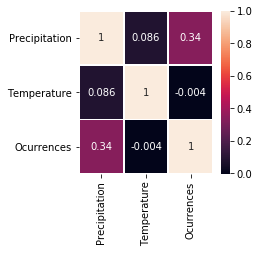

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

t = temp_rain_occur.iloc[:,2:]
corr = t.corr()
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(corr, annot=True, linewidths=.7, ax=ax)

In [73]:
taywan_temp = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/TWN_data.xlsx', sheet_name='Temp')
taywan_rain = pd.read_excel('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/TWN_data.xlsx', sheet_name='Rainfall')
taywan= pd.merge(taywan_temp, taywan_rain, how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
taywan.rename(columns={'Temperature_x':'tas','Temperature_y':'pr'}, inplace=True)
taywan

,temp,Year,Country,pr
0,21.6,1980,TWN,1824.1
1,21.7,1981,TWN,1926.5
2,21.6,1982,TWN,1969.2
3,21.8,1983,TWN,1763.1
4,21.6,1984,TWN,2570.2
5,21.6,1985,TWN,2118.9
6,21.3,1986,TWN,2315.0
7,21.5,1987,TWN,2453.3
8,21.3,1988,TWN,2035.9
9,21.7,1989,TWN,2404.9


In [26]:
taywan.to_csv('taywan.csv')

In [96]:
urban.to_csv('urban.csv')

In [97]:
hdi = pd.read_csv('/Users/RodolfoSaldanha/Desktop/IP/final_project/Datasets/NEW_HDI.csv')
#hdi.rename(columns={'Code':'Country'}, inplace=True)
hdi.drop(columns=['Unnamed: 0'],inplace=True)
hdi.rename(columns={'COUNTRY_ID':'Country','variable':'Year','value':'hdi'}, inplace=True)
hdi.head()

,Country,Year,hdi
0,AFG,1990,NaN
1,ALB,1990,0.645
2,DZA,1990,0.577
3,NaN,1990,NaN
4,AGO,1990,NaN


In [98]:
# Different abbreviation of the same country in different datasets
hdi['Country'] = hdi['Country'].replace('ROU', 'ROM')

In [100]:
hdi_complete= pd.merge(urban, hdi,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])

,Country,Year,Precipitation,Temperature,Ocurrences,Entity,Urban (%),Rural (%),hdi
30,COG,1991,130.302558,24.488583,0.0,Congo,54.743,45.257000,0.535
31,COG,1991,130.302558,24.488583,0.0,Congo,54.743,45.257000,0.353
181,COG,1992,126.681325,24.191667,0.0,Congo,55.162,44.838001,0.535
182,COG,1992,126.681325,24.191667,0.0,Congo,55.162,44.838001,NaN
332,COG,1993,126.340517,24.313542,0.0,Congo,55.580,44.419998,0.528
333,COG,1993,126.340517,24.313542,0.0,Congo,55.580,44.419998,0.340
483,COG,1994,138.248050,24.363042,0.0,Congo,55.996,44.004002,0.524
484,COG,1994,138.248050,24.363042,0.0,Congo,55.996,44.004002,0.334
634,COG,1995,132.580975,24.591575,0.0,Congo,56.413,43.587002,0.507
635,COG,1995,132.580975,24.591575,0.0,Congo,56.413,43.587002,0.333


In [86]:
aux.loc[aux['Year']>25]

,Country,Year,Precipitation,Temperature,Ocurrences,Entity,Urban (%),Rural (%),hdi
30,COG,50,50,50,50,50,50,50,49
49,GIN,100,100,100,100,100,100,100,77
112,SDN,50,50,50,50,50,50,50,31
131,TWN,37,37,37,37,37,37,37,0


In [31]:
hdi_complete.to_csv('hdi.csv')

In [34]:
factors=[]
for x in hdi_complete['Country'].unique():

    lCountry = []
    lCountry.append(x)        
    country = hdi_complete.loc[hdi_complete["Country"] == x]
    value = country[:,['Precipitation','Temperature','hdi']]
    value


TypeError: unhashable type: 'slice'

In [36]:
for x in hdi_complete['Country'].unique():
    print(x)

AUS
BRA
COL
FJI
GUF
IND
ITA
MAC
MEX
MYS
NGA
NPL
PRI
THA
TTO
USA
ZAF
ALB
CUB
DJI
IDN
JPN
NZL
PNG
VEN
CIV
COM
DOM
PAK
PAN
PYF
CHN
NIC
VNM
ARG
GTM
HND
JAM
LBR
PHL
SEN
BOL
GRD
LKA
MTQ
PER
SGP
TWN
BGD
BLZ
CRI
CYM
GAB
MDG
BFA
FRA
REU
GHA
MMR
SLV
GIN
KHM
LBN
ASM
CMR
COK
ISR
KEN
KOR
NCL
AFG
ESP
HRV
HTI
TON
UGA
URY
GLP
MYT
NLD
PRY
SAU
BMU
GEO
MDV
MUS
SVN
SYC
GRC
LAO
SDN
YEM
ATG
CAF
SRB
BEL
BIH
CHE
DZA
GUM
KNA
MHL
MLT
MNE
BGR
COG
DEU
RUS
TUR
AUT
BRN
CZE
ROM
SVK
ZMB


In [101]:
t = urban.loc[hdi_complete["Country"] == 'AUS'].reset_index(drop=True).copy()

In [120]:
aux=t[['Year','Precipitation','Temperature']]
aux.set_index('Year',inplace=True)
aux

,Precipitation,Temperature
Year,,
1991,37.912953,22.172075
1992,155.828248,24.804475
1993,125.000000,22.324975
1994,142.459811,11.781755
1995,118.500588,26.617717
1996,141.729008,25.353375
1997,53.384293,9.306232
1998,39.986758,13.987028
1999,107.207276,27.443808


In [121]:
j = pd.DataFrame(np.diff(aux))
#t.dtypes
j

,0
0,-15.740878
1,-131.023773
2,-102.675025
3,-130.678056
4,-91.882872
5,-116.375633
6,-44.078062
7,-25.999730
8,-79.763467
9,-107.707925


,Country,Year,Precipitation,Temperature,Ocurrences,Entity,Urban (%),Rural (%)
0,ABW,1991,38.882968,28.078008,0.0,Aruba,50.304,49.695999
1,AFG,1991,36.931453,13.118033,0.0,Afghanistan,21.266,78.734001
2,AGO,1991,83.844948,21.652200,0.0,Angola,38.580,61.419998
3,AIA,1991,113.631158,26.108292,0.0,Anguilla,100.000,0.000000
4,ALB,1991,77.587033,11.038935,0.0,Albania,36.700,63.299999
5,ARG,1991,52.792958,14.416431,0.0,Argentina,87.328,12.672000
6,ASM,1991,263.307917,26.879967,0.0,American Samoa,81.886,18.114000
7,ATG,1991,183.339717,26.413642,0.0,Antigua and Barbuda,35.465,64.535004
8,AUS,1991,37.912953,22.172075,31.0,Australia,85.403,14.597000
9,AUT,1991,94.343317,6.151395,0.0,Austria,62.689,37.311001
